In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("Cervical_Cancer_Cleaned.csv")

In [ ]:
data.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,False,0.0,0.0,False,0.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False,False,False,False
1,15.0,1.0,14.0,1.0,False,0.0,0.0,False,0.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False,False,False,False
2,34.0,1.0,25.0,1.0,False,0.0,0.0,False,0.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False,False,False,False
3,52.0,5.0,16.0,4.0,True,37.0,37.0,True,3.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,True,False,True,False,False,False,False,False
4,46.0,3.0,21.0,4.0,False,0.0,0.0,True,15.0,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False,False,False,False


In [ ]:
data.shape

(858, 32)

# Target variable is Biopsy

In [ ]:
data.drop(['Hinselmann','Schiller','Citology'],axis=1,inplace=True)

In [ ]:
data

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Biopsy
0,18.0,4.0,15.0,1.0,False,0.0,0.0,False,0.00,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False
1,15.0,1.0,14.0,1.0,False,0.0,0.0,False,0.00,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False
2,34.0,1.0,25.0,1.0,False,0.0,0.0,False,0.00,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False
3,52.0,5.0,16.0,4.0,True,37.0,37.0,True,3.00,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,True,False,True,False,False
4,46.0,3.0,21.0,4.0,False,0.0,0.0,True,15.00,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34.0,3.0,18.0,0.0,False,0.0,0.0,False,0.00,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False
854,32.0,2.0,19.0,1.0,False,0.0,0.0,True,8.00,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False
855,25.0,2.0,17.0,0.0,False,0.0,0.0,True,0.08,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False
856,33.0,2.0,24.0,2.0,False,0.0,0.0,True,0.08,False,0.0,False,0.0,False,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,False


In [ ]:
data.shape

(858, 29)

# Data Preprocessing

Data Encoding and Data Scaling

In [ ]:
for col in data.columns:
  print(col)
  print(data[col].unique())

Since no categorical variables have multiple categories, data encoding is not required

# Distribution of the classes in the target variable

In [ ]:
data['Biopsy'].value_counts()

False    803
True      55
Name: Biopsy, dtype: int64

 Making the target and predictor variables 

In [ ]:
import seaborn as sns

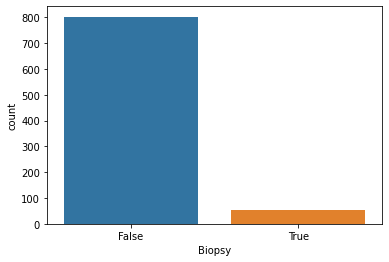

In [ ]:
sns.countplot(data=data,x='Biopsy');

This is a case of imbalanced classification

# Making the target and predictor variables

In [ ]:
x = data.drop('Biopsy',axis=1)
y=data['Biopsy']


In [ ]:
print(x.shape)
print(y.shape)

(858, 28)
(858,)


# Data scaling


In [ ]:
from sklearn.preprocessing import StandardScaler
x=StandardScaler().fit_transform(x)

In [ ]:
x[0]

array([-1.03856336,  0.18899462, -0.71507369, -0.47691956, -0.4090806 ,
       -0.3167311 , -0.22155443, -1.47972669, -0.61501755, -0.32725643,
       -0.44840262, -0.31845261, -0.39430742, -0.23249528, -0.06843859,
       -0.22969705, -0.14638501, -0.03415935, -0.03415935, -0.03415935,
       -0.14638501, -0.03415935, -0.04833682, -0.28909302, -0.14638501,
       -0.10295973, -0.14638501, -0.16963779])

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
y_train.value_counts()

False    560
True      40
Name: Biopsy, dtype: int64

In [ ]:
y_test.value_counts()

False    243
True      15
Name: Biopsy, dtype: int64

# Baseline Model

Baseline model does not have relevance in case of an imbalanced classification because accuracy is not a suitable metric in such cases.

The usual way of defining a baseline model is to consider a model which predicts the value to be equal to the majority class.

Here, in the training dataset, the two classes, majority and minority (+ve and -ve) are present in the ratio 93:7. So, the baseline model in this case has an accuracy of 93% because when it predicts all values to belong to the negative class, it still makes 93% correct predictions owing to the class distrubution

# Logistic regressing using all the variables

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
model1 = LogisticRegression()

In [ ]:
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = model1.predict(x_test)

In [ ]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
model1.predict_proba(x_test)

array([[9.46989260e-01, 5.30107396e-02],
       [9.44387917e-01, 5.56120832e-02],
       [9.25662650e-01, 7.43373495e-02],
       [9.52709923e-01, 4.72900775e-02],
       [9.70752730e-01, 2.92472697e-02],
       [9.00056615e-01, 9.99433853e-02],
       [9.48024483e-01, 5.19755170e-02],
       [9.54814652e-01, 4.51853476e-02],
       [9.44198200e-01, 5.58017995e-02],
       [9.99228383e-01, 7.71616638e-04],
       [9.54450853e-01, 4.55491474e-02],
       [9.45724619e-01, 5.42753810e-02],
       [9.34336461e-01, 6.56635385e-02],
       [9.01757610e-01, 9.82423899e-02],
       [9.25400363e-01, 7.45996375e-02],
       [9.35908267e-01, 6.40917332e-02],
       [9.46388616e-01, 5.36113845e-02],
       [9.44153096e-01, 5.58469040e-02],
       [9.60278567e-01, 3.97214327e-02],
       [9.52074371e-01, 4.79256292e-02],
       [9.48589332e-01, 5.14106677e-02],
       [9.87055510e-01, 1.29444900e-02],
       [9.85492091e-01, 1.45079093e-02],
       [9.42062943e-01, 5.79370568e-02],
       [9.478648

In [ ]:
confusion_matrix(y_test,y_pred)

array([[242,   1],
       [ 14,   1]])

In [ ]:
precision_recall_fscore_support(y_test,y_pred)

(array([0.9453125, 0.5      ]),
 array([0.99588477, 0.06666667]),
 array([0.96993988, 0.11764706]),
 array([243,  15]))

# Finetuning the model

In [ ]:
model2 = LogisticRegression(class_weight = {0:7, 1:93})

In [ ]:
model2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight={0: 7, 1: 93}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred =model2.predict(x_test)

In [ ]:
y_pred

array([False, False,  True, False, False,  True, False, False, False,
       False, False, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,

In [ ]:
model2.predict_proba(x_test)

In [ ]:
confusion_matrix(y_test,y_pred)

array([[199,  44],
       [  8,   7]])

In [ ]:
precision_recall_fscore_support(y_test,y_pred)

(array([0.96135266, 0.1372549 ]),
 array([0.81893004, 0.46666667]),
 array([0.88444444, 0.21212121]),
 array([243,  15]))